In [11]:
import pandas as pd 
from matplotlib import pyplot as plt 


from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans



import seaborn as sn

### Load and create DataFrame

In [12]:
df = pd.read_csv('df_audio_features_10.csv')
df.head(10)

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,My Band,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
1,The Real Slim Shady,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
2,Águas De Março,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
3,The Girl From Ipanema,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
4,"Paint It, Black",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
5,Sultans Of Swing,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
6,Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
7,In Silence,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4,7n92QzQomRCLlciO14X0kd,https://open.spotify.com/track/7n92QzQomRCLlci...


### Drop Columns

In [13]:
df = df.drop(columns = ["song_name", "artist", "id", "html"])
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.851,0.849,1,-3.383,0,0.0828,0.4970,0.000002,0.1160,0.844,120.014,298773,4
1,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,284200,4
2,0.642,0.339,3,-15.503,1,0.1400,0.8540,0.000000,0.1050,0.491,143.418,212400,4
3,0.641,0.140,8,-16.790,1,0.0390,0.8670,0.001660,0.1050,0.388,129.318,317987,4
4,0.464,0.795,1,-9.267,1,0.0926,0.0493,0.002440,0.3990,0.612,158.691,202267,4


### Normalize the Data

In [14]:
# create the scaler
scaler = MinMaxScaler( feature_range= (0,1) )

scaler.fit(df[["danceability"]]) 
df["danceability"]  = scaler.transform(df[["danceability"]])

scaler.fit(df[["energy"]]) 
df["energy"]  = scaler.transform(df[["energy"]])

scaler.fit(df[["key"]]) 
df["key"]  = scaler.transform(df[["key"]])

scaler.fit(df[["loudness"]]) 
df["loudness"]  = scaler.transform(df[["loudness"]])


scaler.fit(df[["mode"]]) 
df["mode"]  = scaler.transform(df[["mode"]])

scaler.fit(df[["speechiness"]]) 
df["speechiness"]  = scaler.transform(df[["speechiness"]])

scaler.fit(df[["acousticness"]]) 
df["acousticness"]  = scaler.transform(df[["acousticness"]])

scaler.fit(df[["instrumentalness"]]) 
df["instrumentalness"]  = scaler.transform(df[["instrumentalness"]])

scaler.fit(df[["liveness"]]) 
df["liveness"]  = scaler.transform(df[["liveness"]])


scaler.fit(df[["valence"]]) 
df["valence"]  = scaler.transform(df[["valence"]])

scaler.fit(df[["tempo"]]) 
df["tempo"]  = scaler.transform(df[["tempo"]])

scaler.fit(df[["duration_ms"]]) 
df["duration_ms"]  = scaler.transform(df[["duration_ms"]])

scaler.fit(df[["time_signature"]]) 
df["time_signature"]  = scaler.transform(df[["time_signature"]])

df.head()





,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.871895,1.000000,0.000000,1.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0.574526,1.0
1,1.000000,0.776369,0.571429,0.971414,0.0,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0.530220,1.0
2,0.598693,0.393341,0.285714,0.597610,1.0,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,0.311930,1.0
3,0.597386,0.156625,1.000000,0.554880,1.0,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,0.632941,1.0
4,0.366013,0.935766,0.000000,0.804648,1.0,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,0.281123,1.0


## K-Means, build and train the model

### Find the right K-Value

#### 1. Elbow Method

In [16]:
list_of_inertias = []
k_range = range(2, 10)

for k in k_range:
    model = KMeans(n_clusters = k)

    # Fit the model 
    model.fit(df[['danceability', 'energy',	'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature' ]]) # calculate the centroids
    
    # add the error to the list
    list_of_inertias.append(model.inertia_) 

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

##### Plot Elbow

Text(0, 0.5, 'Error')

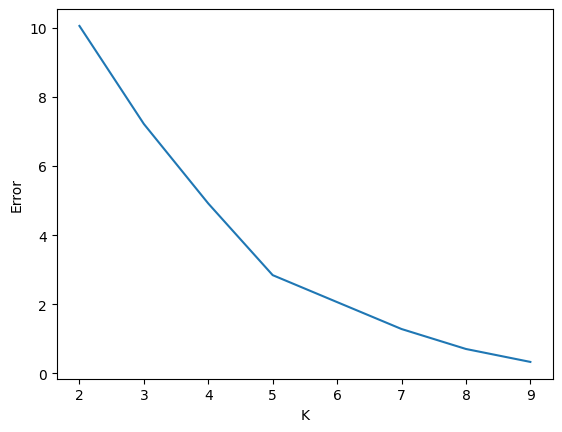

In [17]:
# Plot the Error list
plt.plot(k_range, list_of_inertias)
plt.xlabel("K")
plt.ylabel("Error")

### 2. Silhouete Score

In [19]:
list_of_silhouetescores = []
k_range = range(2, 10)

for k in k_range:
    model = KMeans(n_clusters = k)

    # Fit the model 
    model.fit(df[['danceability', 'energy',	'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]) # calculate the centroids
    
    # add the error to the list
    s_score = silhouette_score(df[['danceability', 'energy',	'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']], model.labels_)
    
    list_of_silhouetescores.append(s_score)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

#### Plot Silhouette

Text(0, 0.5, 'Silh. Score')

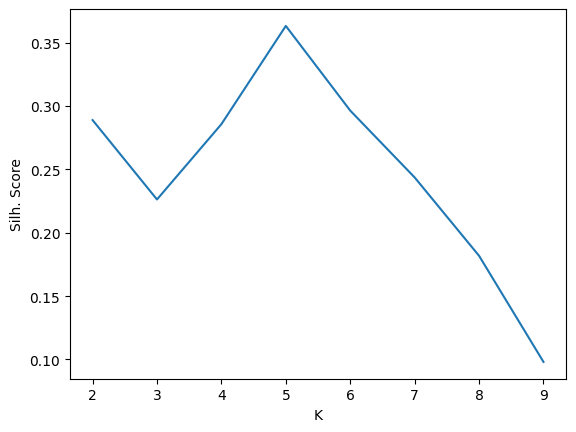

In [20]:
plt.plot(k_range, list_of_silhouetescores)
plt.xlabel("K")
plt.ylabel("Silh. Score")

## K-Means

In [21]:
model = KMeans(n_clusters= 5)

# Fit the model and Assign the rows to the clusters
y_predicted_kmeans = model.fit_predict(df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']])
y_predicted_kmeans

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 4, 3, 3, 0, 0, 2, 2, 1, 1])

### Plot

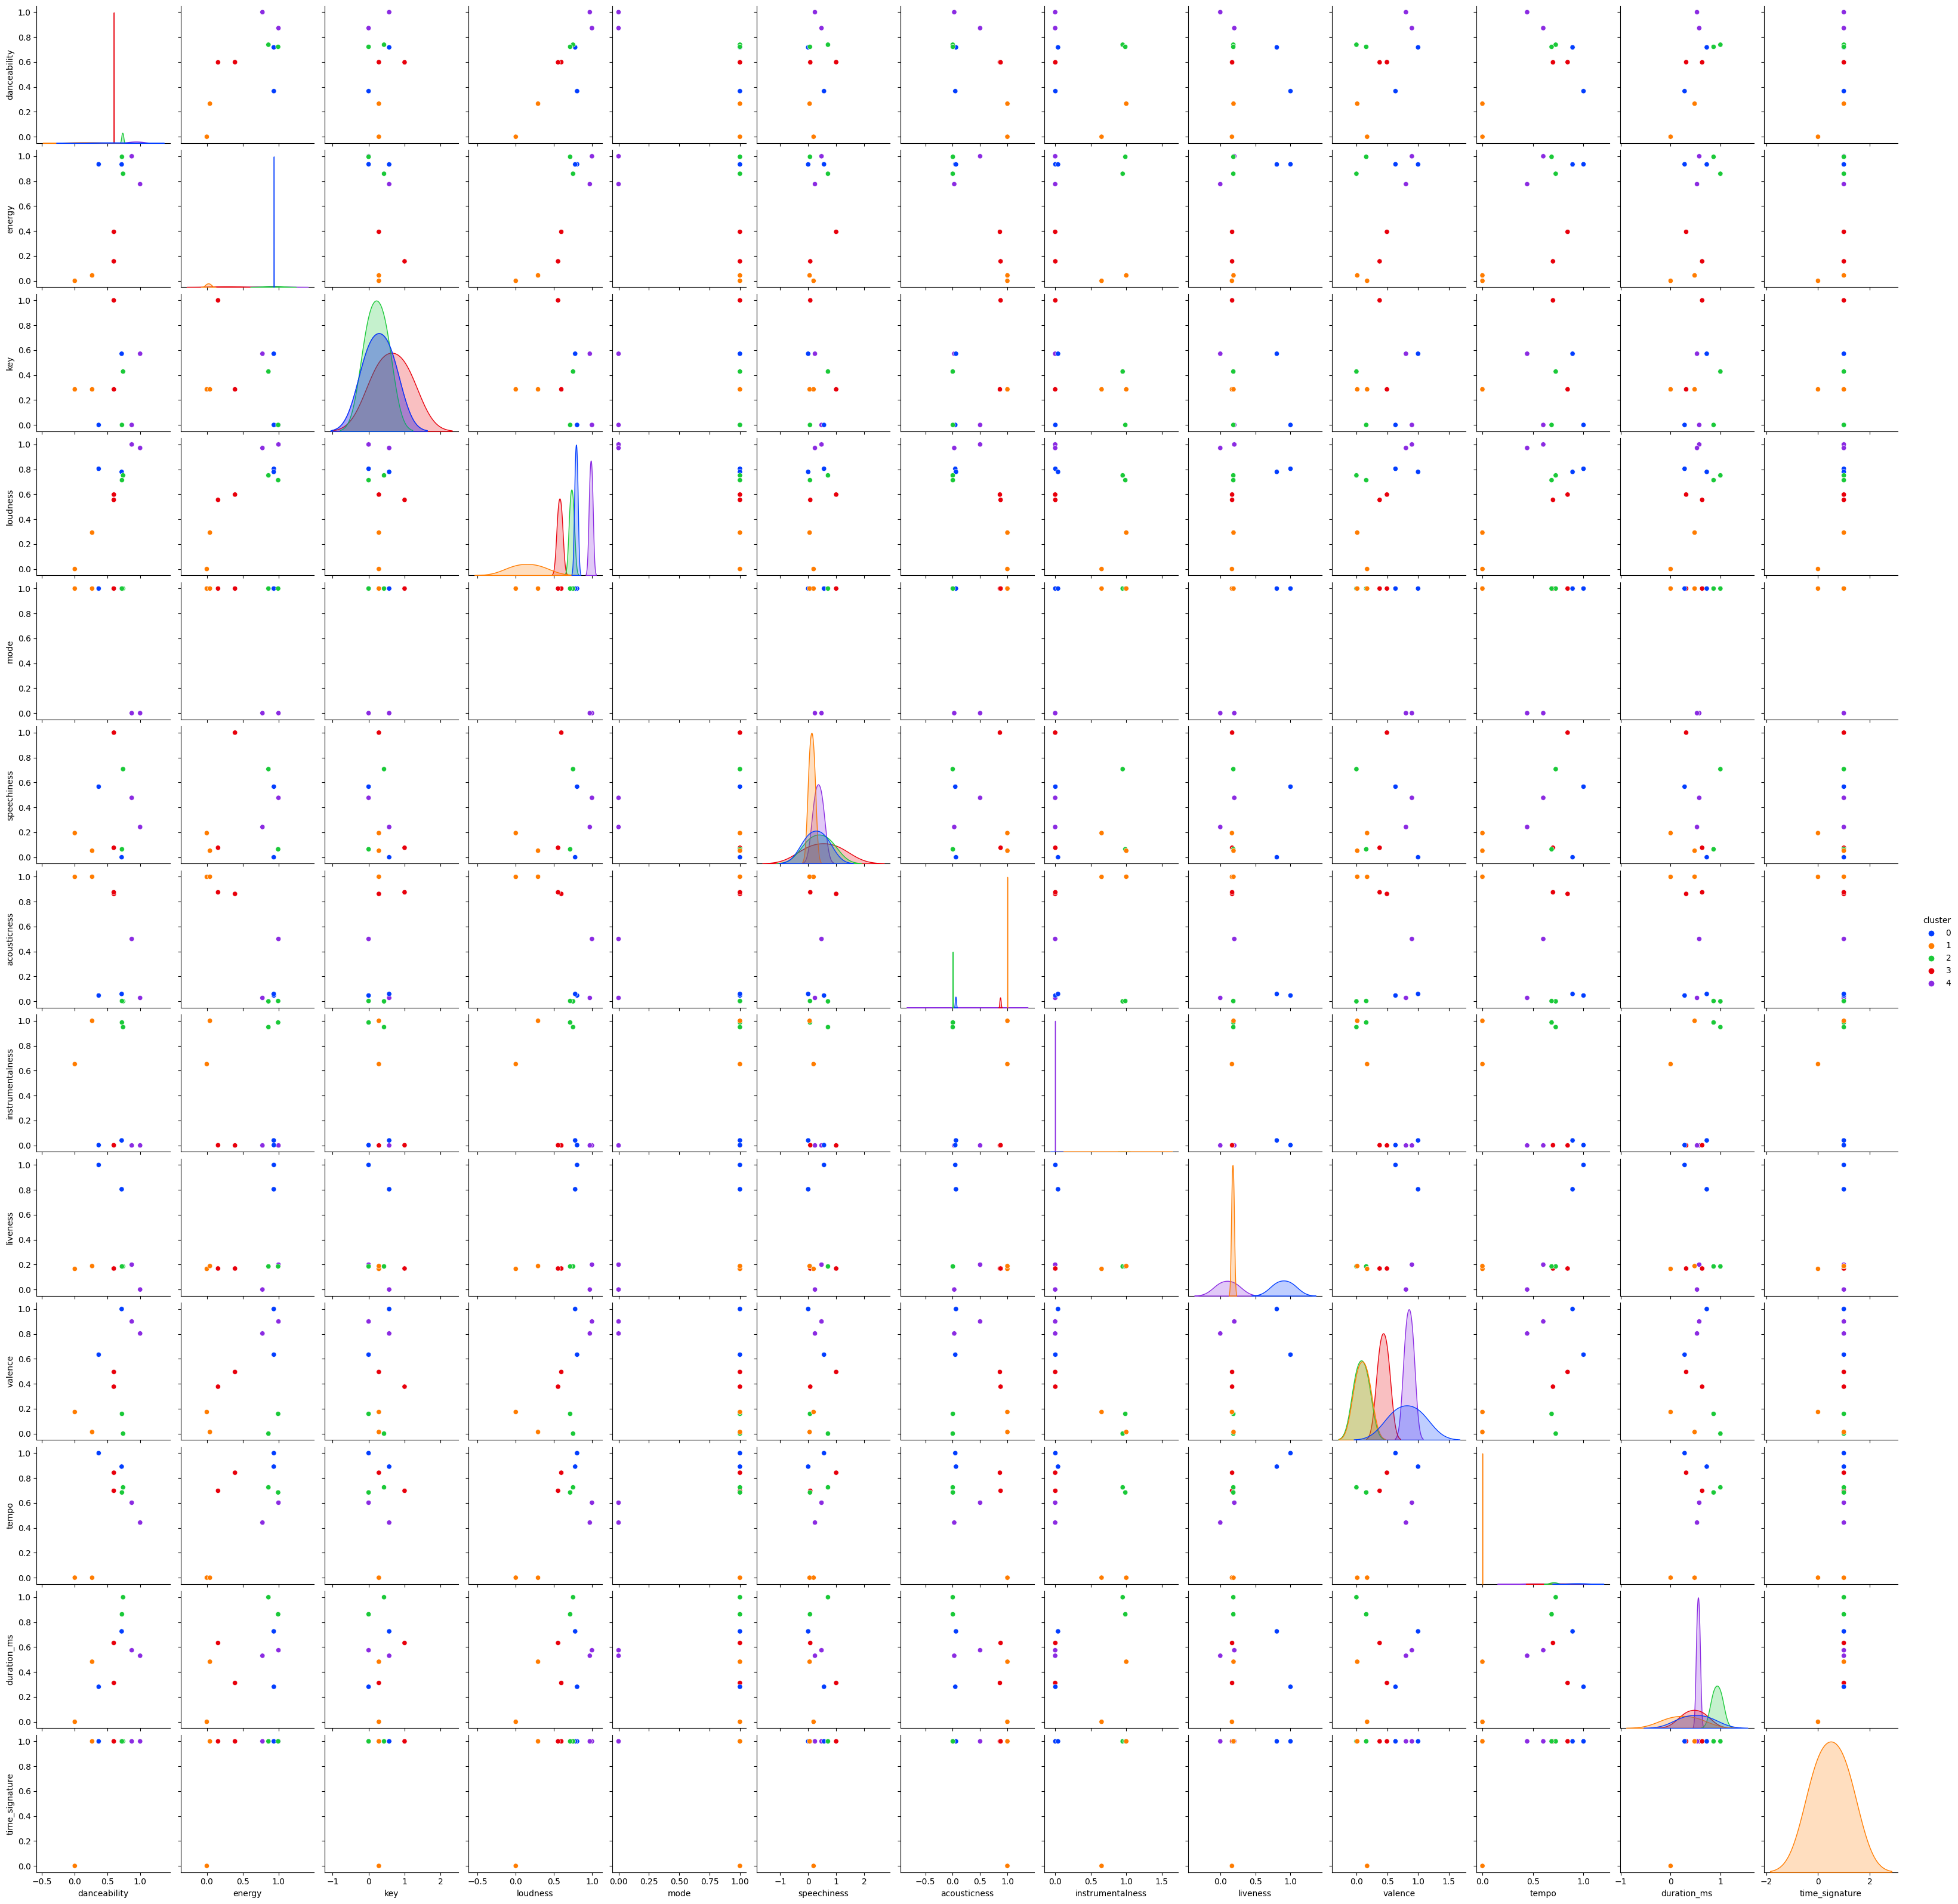

In [23]:
# Attach the predicted clusted into the main df
df["cluster"] = y_predicted_kmeans
sn.pairplot(df, hue = 'cluster', palette= 'bright')